# Introduction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


from wordcloud import WordCloud
import nltk

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_auc_score, roc_curve, precision_score, recall_score


# Data Inspection

In [2]:
train_data = pd.read_csv(r'C:\Users\ambekar_tejas\Desktop\FinalProject\data\raw\train.csv')
test_data = pd.read_csv(r'C:\Users\ambekar_tejas\Desktop\FinalProject\data\raw\test.csv')

In [4]:
train_data.head()

,review,sentiment
0,I caught this little gem totally by accident b...,positive
1,I can't believe that I let myself into this mo...,negative
2,*spoiler alert!* it just gets to me the nerve ...,negative
3,If there's one thing I've learnt from watching...,negative
4,"I remember when this was in theaters, reviews ...",negative


In [23]:
test_data.head()

,review,sentiment
0,"Yes, MTV there really is a way to market Daria...",negative
1,The story of the bride fair is an amusing and ...,negative
2,"A team varied between Scully and Mulder, two o...",positive
3,This was a popular movie probably because of t...,negative
4,This movie made me so angry!! Here I am thinki...,negative


In [24]:
train_data.shape

(40000, 2)

In [25]:
test_data.shape

(10000, 2)

In [26]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     40000 non-null  object
 1   sentiment  40000 non-null  object
dtypes: object(2)
memory usage: 625.1+ KB


In [27]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     10000 non-null  object
 1   sentiment  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


# Exploratory Data Analysis (EDA)

In [5]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ambekar_tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ambekar_tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ambekar_tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
duplicate_count_train = train_data.duplicated(subset='review').sum()
duplicate_count_test = test_data.duplicated(subset='review').sum()
print(f"Number of duplicate reviews in training data: {duplicate_count_train}")
print(f"Number of duplicate reviews in testing data: {duplicate_count_test}")

Number of duplicate reviews in training data: 272
Number of duplicate reviews in testing data: 13


In [4]:
train_data.drop_duplicates(inplace=True)
test_data.drop_duplicates(inplace=True)

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re


class SentimentEDA:
    """A class to perform EDA on train and test datasets with side-by-side visualizations."""

    def __init__(self, train_df, test_df):
        """
        Initialize the EDA class with train and test DataFrames.

        Args:
            train_df (pd.DataFrame): Training DataFrame with 'review' and 'sentiment' columns.
            test_df (pd.DataFrame): Test DataFrame with 'review' and 'sentiment' columns.
        """
        self.train_df = train_df
        self.test_df = test_df
        self.stop_words = set(stopwords.words('english'))



    def check_basic_info(self):
        """Check basic dataset info: shape, columns, missing values, and duplicates for both datasets."""
        print("=== Train Dataset ===")
        print("Shape:", self.train_df.shape)
        print("Columns:", self.train_df.columns.tolist())
        print("Missing Values:\n", self.train_df.isnull().sum())
        train_duplicates = self.train_df.duplicated().sum()
        print("Duplicate Rows:", train_duplicates)

        print("\n=== Test Dataset ===")
        print("Shape:", self.test_df.shape)
        print("Columns:", self.test_df.columns.tolist())
        print("Missing Values:\n", self.test_df.isnull().sum())
        test_duplicates = self.test_df.duplicated().sum()
        print("Duplicate Rows:", test_duplicates)

        return {
            'train': {'shape': self.train_df.shape, 'missing': self.train_df.isnull().sum().to_dict(), 'duplicates': train_duplicates},
            'test': {'shape': self.test_df.shape, 'missing': self.test_df.isnull().sum().to_dict(), 'duplicates': test_duplicates}
        }

    def plot_class_distribution(self):
        """Plot class distribution for train and test datasets side by side with count labels."""
        fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
        sns.set_style("whitegrid")

        # Train dataset
        sns.countplot(data=self.train_df, x='sentiment', ax=axes[0], palette='Set2')
        axes[0].set_title('Train Sentiment Distribution')
        axes[0].set_xlabel('Sentiment')
        axes[0].set_ylabel('Count')
        for p in axes[0].patches:
            height = p.get_height()
            axes[0].text(p.get_x() + p.get_width()/2., height + 1, int(height),
                         ha="center", fontsize=10)

        # Test dataset
        sns.countplot(data=self.test_df, x='sentiment', ax=axes[1], palette='Set3')
        axes[1].set_title('Test Sentiment Distribution')
        axes[1].set_xlabel('Sentiment')
        for p in axes[1].patches:
            height = p.get_height()
            axes[1].text(p.get_x() + p.get_width()/2., height + 1, int(height),
                         ha="center", fontsize=10)

        plt.suptitle('Sentiment Distribution in Train and Test Sets', fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()



    def plot_review_length_distributions(self):
        """Plot review length distributions (word counts) for train and test datasets."""
        self.train_df['review_len'] = self.train_df['review'].apply(lambda x: len(x.split()))
        self.test_df['review_len'] = self.test_df['review'].apply(lambda x: len(x.split()))

        fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
        sns.set_style("whitegrid")
        sns.histplot(data=self.train_df, x='review_len', hue='sentiment', bins=30, kde=True,
                     ax=axes[0], palette='Set2', multiple='stack')
        axes[0].set_title('Train Review Length Distribution')
        axes[0].set_xlabel('Review Length (words)')
        axes[0].set_ylabel('Count')

        sns.histplot(data=self.test_df, x='review_len', hue='sentiment', bins=30, kde=True,
                     ax=axes[1], palette='Set2', multiple='stack')
        axes[1].set_title('Test Review Length Distribution')
        axes[1].set_xlabel('Review Length (words)')
        axes[1].set_ylabel('')

        plt.suptitle('Review Length Distribution by Sentiment in Train and Test Sets', fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

    def plot_avg_word_len_distributions(self):
        """Plot average word length distributions for train and test datasets."""
        self.train_df['avg_word_len'] = self.train_df['review'].apply(
            lambda x: sum(len(word) for word in x.split()) / len(x.split()) if len(x.split()) > 0 else 0
        )
        self.test_df['avg_word_len'] = self.test_df['review'].apply(
            lambda x: sum(len(word) for word in x.split()) / len(x.split()) if len(x.split()) > 0 else 0
        )

        fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
        sns.set_style("whitegrid")

        sns.histplot(data=self.train_df, x='avg_word_len', hue='sentiment', bins=30, kde=True,
                     ax=axes[0], palette='Set2', multiple='stack')
        axes[0].set_title('Train Average Word Length Distribution')
        axes[0].set_xlabel('Average Word Length (characters)')
        axes[0].set_ylabel('Count')

        sns.histplot(data=self.test_df, x='avg_word_len', hue='sentiment', bins=30, kde=True,
                     ax=axes[1], palette='Set2', multiple='stack')
        axes[1].set_title('Test Average Word Length Distribution')
        axes[1].set_xlabel('Average Word Length (characters)')
        axes[1].set_ylabel('')

        plt.suptitle('Average Word Length Distribution by Sentiment in Train and Test Sets', fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

    def plot_review_len_boxplots(self):
        """Plot boxplots of review lengths by sentiment for train and test datasets."""
        self.train_df['review_len'] = self.train_df['review'].apply(lambda x: len(x.split()))
        self.test_df['review_len'] = self.test_df['review'].apply(lambda x: len(x.split()))

        fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
        sns.set_style("whitegrid")

        sns.boxplot(x='sentiment', y='review_len', data=self.train_df, ax=axes[0], palette='Set2')
        axes[0].set_title('Train Review Length by Sentiment')
        axes[0].set_xlabel('Sentiment')
        axes[0].set_ylabel('Review Length (words)')

        sns.boxplot(x='sentiment', y='review_len', data=self.test_df, ax=axes[1], palette='Set2')
        axes[1].set_title('Test Review Length by Sentiment')
        axes[1].set_xlabel('Sentiment')
        axes[1].set_ylabel('')

        plt.suptitle('Review Length by Sentiment in Train and Test Sets', fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

    def generate_word_clouds(self):
        """Generate word clouds for positive and negative reviews side by side."""
        # Prepare text
        train_pos = ' '.join(self.train_df[self.train_df['sentiment'] == 'positive']['review'])
        train_neg = ' '.join(self.train_df[self.train_df['sentiment'] == 'negative']['review'])


        # Generate word clouds
        pos_wc = WordCloud(width=400, height=400, background_color='white', stopwords=self.stop_words, max_words=100).generate(train_pos)
        neg_wc = WordCloud(width=400, height=400, background_color='white', stopwords=self.stop_words, max_words=100).generate(train_neg)

        fig, ax = plt.subplots(1, 2, figsize=(16, 8))
        ax[0].imshow(pos_wc, interpolation='bilinear')
        ax[0].set_title("Positive Reviews Word Cloud")
        ax[0].axis('off')
        ax[1].imshow(neg_wc, interpolation='bilinear')
        ax[1].set_title("Negative Reviews Word Cloud")
        ax[1].axis('off')
        plt.show()

    def analyze_vocabulary(self, top_n=20):
        """Analyze frequent words side by side and check for noisy text."""
        def clean_text(text):
            text = re.sub(r'<[^>]+>', '', text)  # Remove HTML tags
            text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
            return text.lower()

        # Process train dataset
        train_words = []
        for review in self.train_df['review']:
            cleaned = clean_text(review)
            tokens = word_tokenize(cleaned)
            tokens = [t for t in tokens if t not in self.stop_words]
            train_words.extend(tokens)
        train_freq = Counter(train_words).most_common(top_n)

        # Process test dataset
        test_words = []
        for review in self.test_df['review']:
            cleaned = clean_text(review)
            tokens = word_tokenize(cleaned)
            tokens = [t for t in tokens if t not in self.stop_words]
            test_words.extend(tokens)
        test_freq = Counter(test_words).most_common(top_n)

        # Plot frequent words
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
        train_words, train_counts = zip(*train_freq)
        sns.barplot(x=list(train_counts), y=list(train_words), ax=ax1, palette='Set2')
        ax1.set_title(f'Train: Top {top_n} Frequent Words')
        ax1.set_xlabel('Frequency')
        ax1.set_ylabel('Words')

        test_words, test_counts = zip(*test_freq)
        sns.barplot(x=list(test_counts), y=list(test_words), ax=ax2, palette='Set2')
        ax2.set_title(f'Test: Top {top_n} Frequent Words')
        ax2.set_xlabel('Frequency')
        ax2.set_ylabel('Words')

        plt.tight_layout()
        plt.show()

        # Check for noise
        html_pattern = r'<[^>]+>'
        url_pattern = r'http[s]?://\S+'
        train_html = self.train_df['review'].str.contains(html_pattern, regex=True, na=False).sum()
        test_html = self.test_df['review'].str.contains(html_pattern, regex=True, na=False).sum()
        train_urls = self.train_df['review'].str.contains(url_pattern, regex=True, na=False).sum()
        test_urls = self.test_df['review'].str.contains(url_pattern, regex=True, na=False).sum()

        print(f"Train noise: {train_html} reviews with HTML tags, {train_urls} with URLs.")
        print(f"Test noise: {test_html} reviews with HTML tags, {test_urls} with URLs.")

In [32]:
# Initialize EDA class
eda = SentimentEDA(train_data, test_data)

# Run basic info check
results = eda.check_basic_info()



=== Train Dataset ===
Shape: (39728, 2)
Columns: ['review', 'sentiment']
Missing Values:
 review       0
sentiment    0
dtype: int64
Duplicate Rows: 0

=== Test Dataset ===
Shape: (9987, 2)
Columns: ['review', 'sentiment']
Missing Values:
 review       0
sentiment    0
dtype: int64
Duplicate Rows: 0


C:\Users\ambekar_tejas\AppData\Local\Temp\ipykernel_29268\3609363439.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=self.train_df, x='sentiment', ax=axes[0], palette='Set2')
C:\Users\ambekar_tejas\AppData\Local\Temp\ipykernel_29268\3609363439.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=self.test_df, x='sentiment', ax=axes[1], palette='Set3')


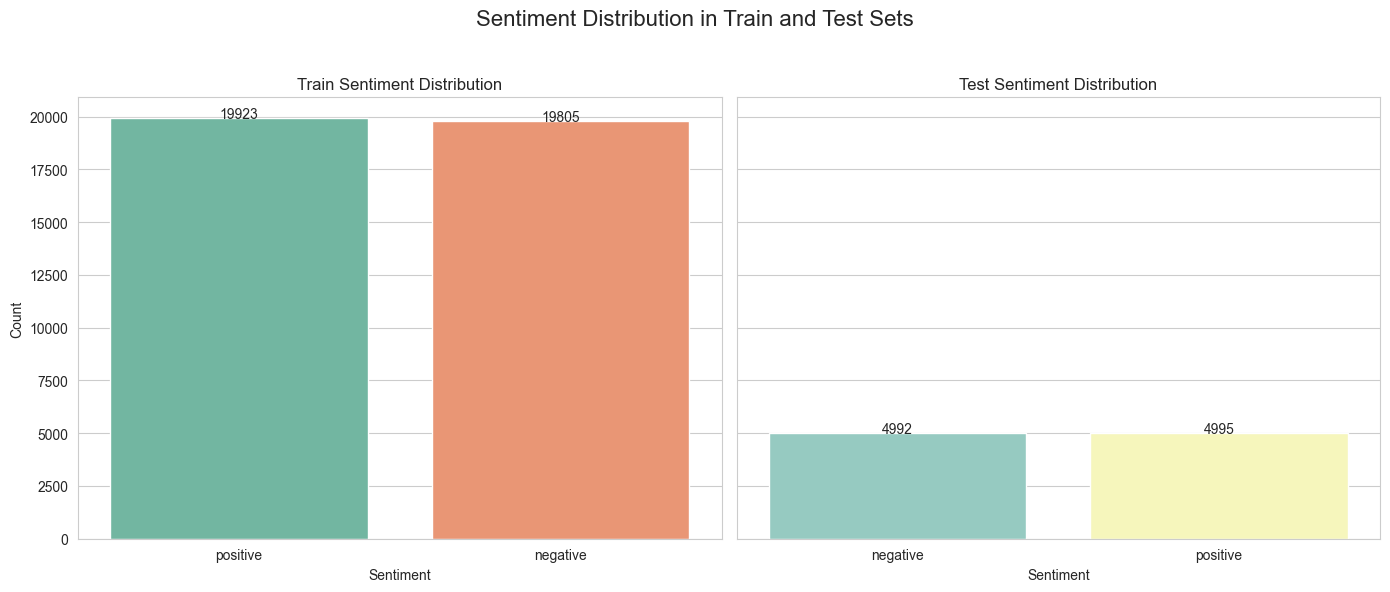

In [33]:
# Run class distribution
eda.plot_class_distribution()



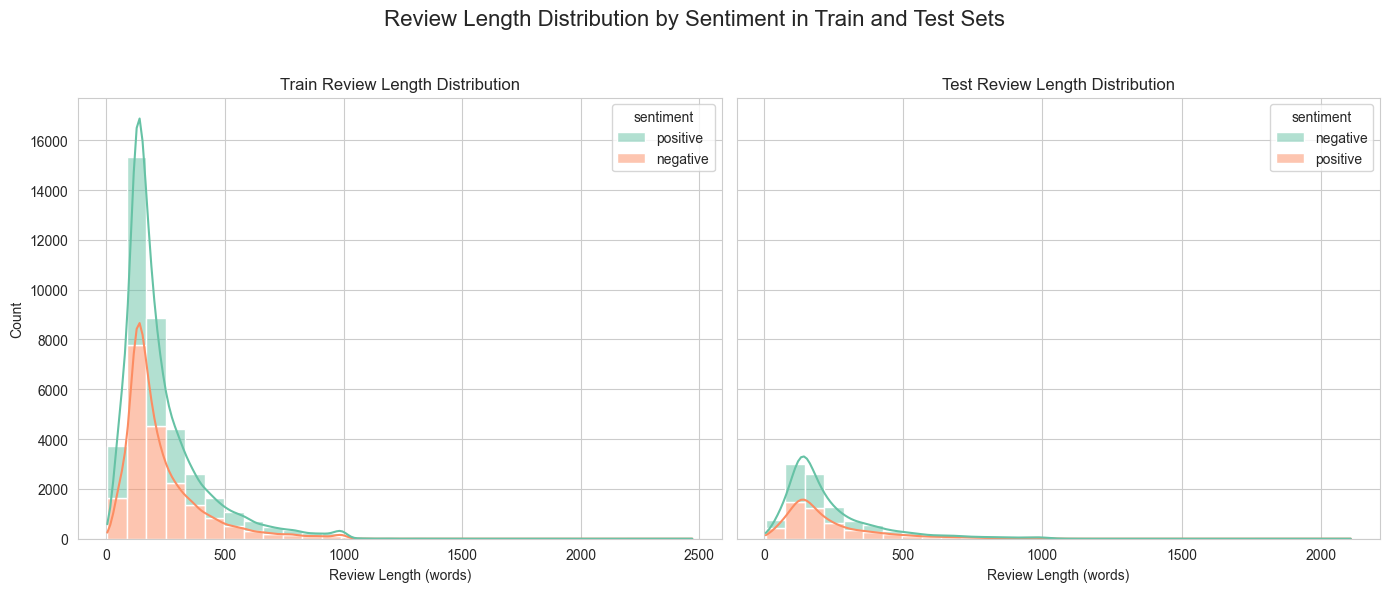

In [34]:
# Run review length distribution
eda.plot_review_length_distributions()



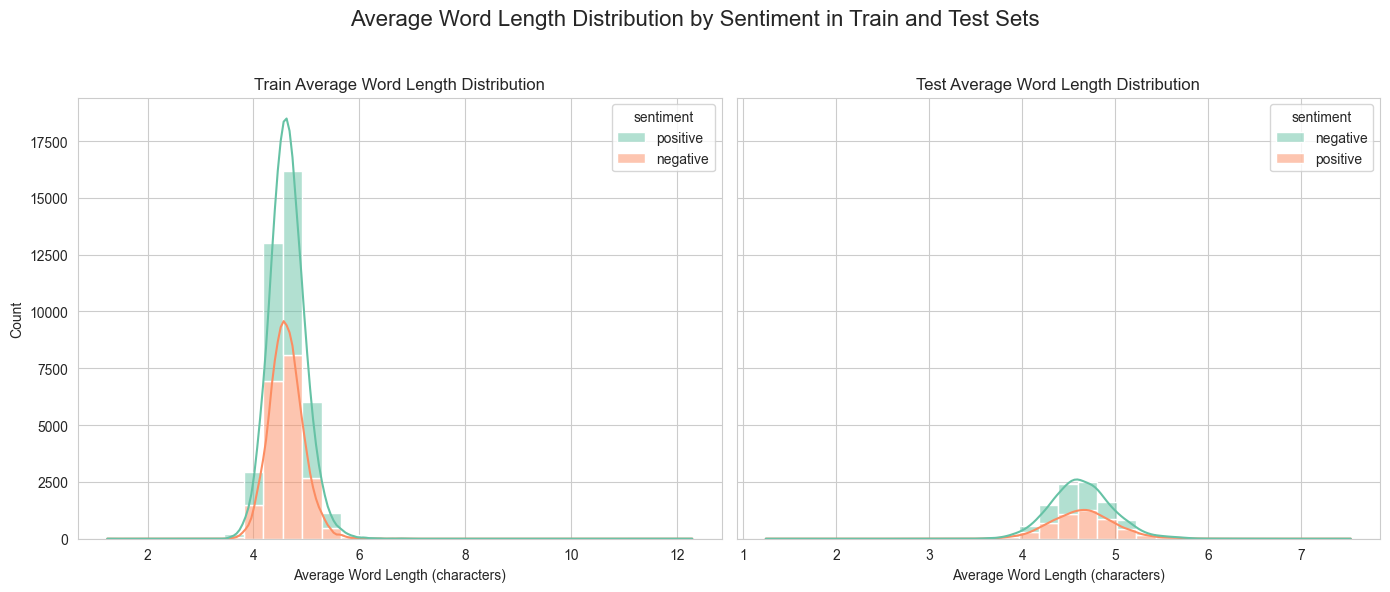

In [35]:
# Run average word length distribution
eda.plot_avg_word_len_distributions()



C:\Users\ambekar_tejas\AppData\Local\Temp\ipykernel_29268\3609363439.py:139: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='review_len', data=self.train_df, ax=axes[0], palette='Set2')
C:\Users\ambekar_tejas\AppData\Local\Temp\ipykernel_29268\3609363439.py:144: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='review_len', data=self.test_df, ax=axes[1], palette='Set2')


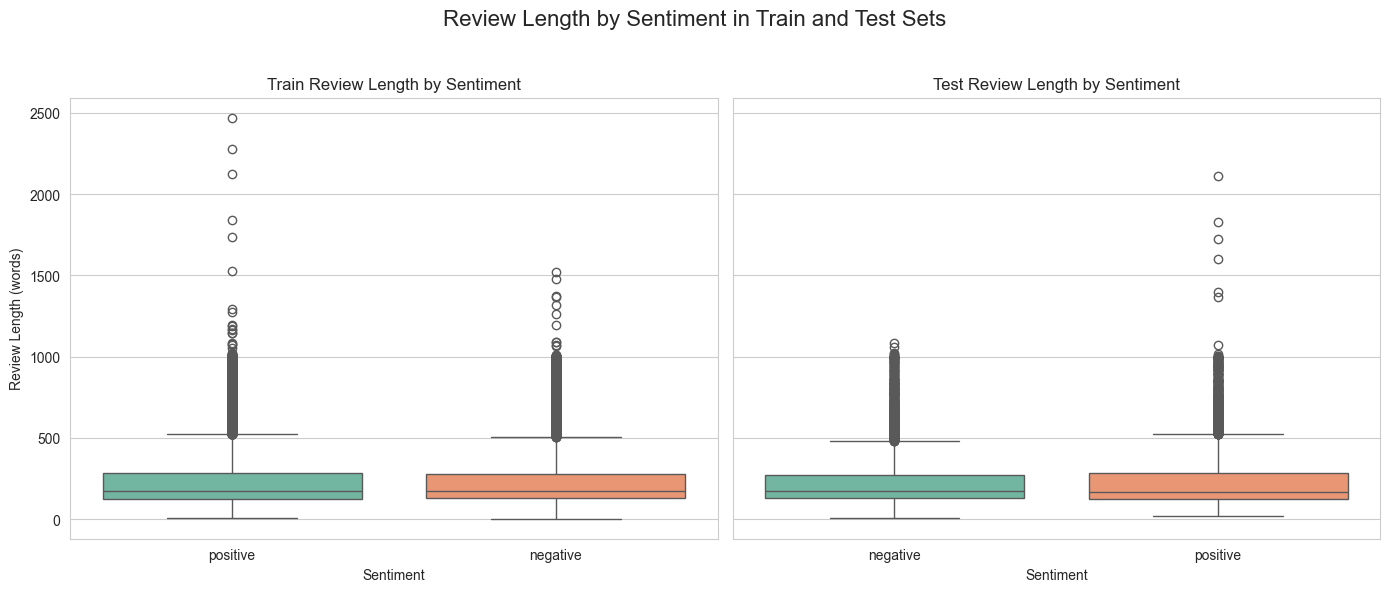

In [36]:
# Run review length boxplots
eda.plot_review_len_boxplots()


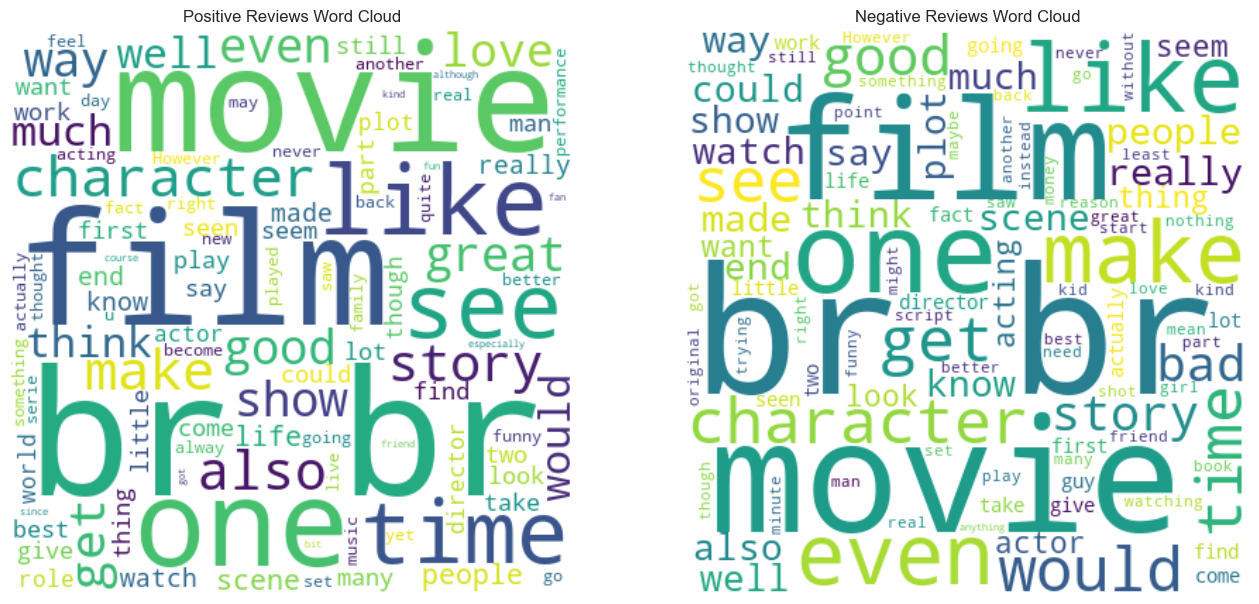

In [37]:
# Run word clouds
eda.generate_word_clouds()



C:\Users\ambekar_tejas\AppData\Local\Temp\ipykernel_29268\3609363439.py:201: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(train_counts), y=list(train_words), ax=ax1, palette='Set2')
C:\Users\ambekar_tejas\AppData\Local\Temp\ipykernel_29268\3609363439.py:207: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(test_counts), y=list(test_words), ax=ax2, palette='Set2')


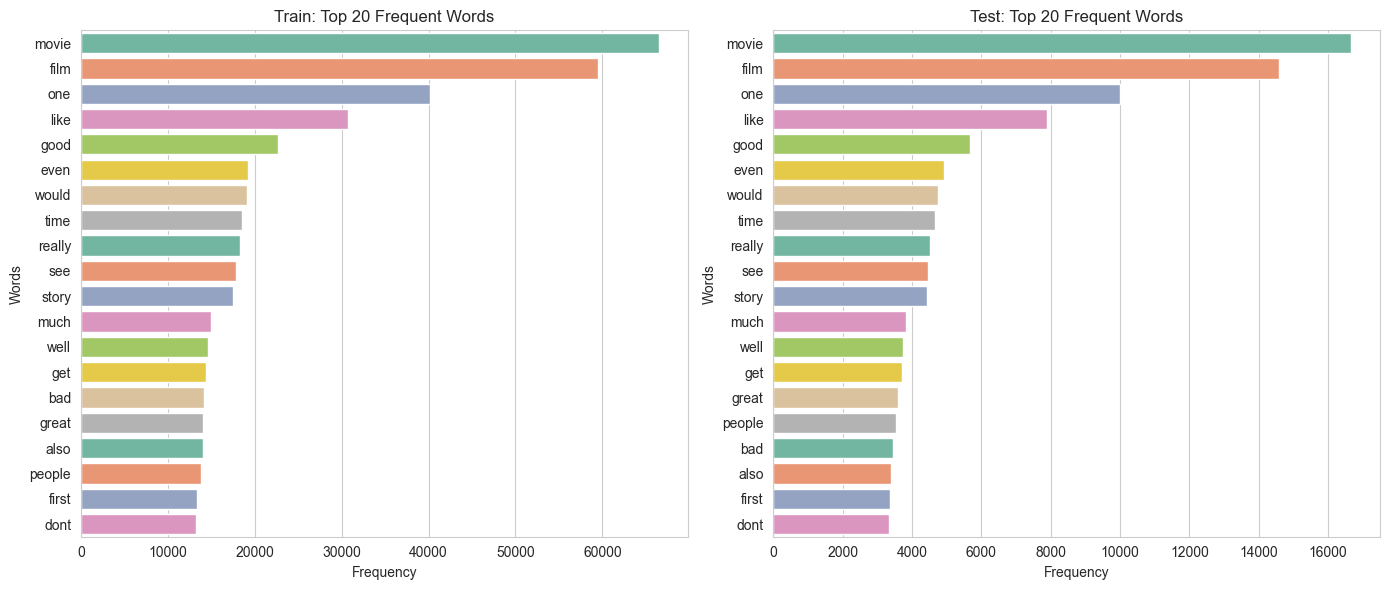

Train noise: 23125 reviews with HTML tags, 97 with URLs.
Test noise: 5916 reviews with HTML tags, 22 with URLs.


In [38]:
# Run vocabulary analysis
eda.analyze_vocabulary()



# Text Preprocessing

In [5]:
# Preprocessing
from sklearn.decomposition import TruncatedSVD
import re

class TextPreprocessor:
    """A class to preprocess text data for sentiment analysis."""

    def __init__(self, train_df, test_df):
        self.train_df = train_df.copy()
        self.test_df = test_df.copy()
        self.stop_words = set(stopwords.words('english'))
        self.stemmer = PorterStemmer()
        self.lemmatizer = WordNetLemmatizer()
        self.cv = None
        self.tfidf = None
        self.svd = None
        self.x_train_cv = None
        self.x_test_cv = None
        self.x_train_tfidf = None
        self.x_test_tfidf = None
        self.x_train_reduced_cv = None
        self.x_test_reduced_cv = None
        self.x_train_reduced_tfidf = None
        self.x_test_reduced_tfidf = None
    def clean_text(self, text):
        """Clean text by removing HTML tags, special characters, and converting to lowercase."""
        text = re.sub(r'<[^>]+>', '', text)  # Remove HTML tags
        text = re.sub(r'http[s]?://\S+', '', text)  # Remove URLs
        text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
        return text.lower()

    def tokenize(self):
        """Tokenize reviews and display sample results."""
        # Clean and tokenize
        self.train_df['tokens'] = self.train_df['review'].apply(
            lambda x: word_tokenize(self.clean_text(x))
        )
        self.test_df['tokens'] = self.test_df['review'].apply(
            lambda x: word_tokenize(self.clean_text(x))
        )

        # Display samples
        print("=== Train Dataset: Sample Tokenized Reviews ===")
        for idx, row in self.train_df[['review', 'tokens']].head(3).iterrows():
            print(f"Original: {row['review'][:100]}...")
            print(f"Tokens: {row['tokens'][:20]}...\n")

        print("=== Test Dataset: Sample Tokenized Reviews ===")
        for idx, row in self.test_df[['review', 'tokens']].head(3).iterrows():
            print(f"Original: {row['review'][:100]}...")
            print(f"Tokens: {row['tokens'][:20]}...\n")

        # Display token counts
        train_token_count = self.train_df['tokens'].apply(len).sum()
        test_token_count = self.test_df['tokens'].apply(len).sum()
        print(f"Total tokens in train: {train_token_count}")
        print(f"Total tokens in test: {test_token_count}")

        return self.train_df, self.test_df

    def remove_stop_words(self):
        """Remove stop-words from tokenized reviews and display results."""
        # Ensure tokenization has been done
        if 'tokens' not in self.train_df.columns:
            self.tokenize()

        # Remove stop-words
        self.train_df['tokens_no_stop'] = self.train_df['tokens'].apply(
            lambda x: [token for token in x if token not in self.stop_words]
        )
        self.test_df['tokens_no_stop'] = self.test_df['tokens'].apply(
            lambda x: [token for token in x if token not in self.stop_words]
        )

        # Display samples
        print("=== Train Dataset: Sample Tokens After Stop-Word Removal ===")
        for idx, row in self.train_df[['tokens', 'tokens_no_stop']].head(3).iterrows():
            print(f"Before: {row['tokens'][:20]}...")
            print(f"After: {row['tokens_no_stop'][:20]}...\n")

        print("=== Test Dataset: Sample Tokens After Stop-Word Removal ===")
        for idx, row in self.test_df[['tokens', 'tokens_no_stop']].head(3).iterrows():
            print(f"Before: {row['tokens'][:20]}...")
            print(f"After: {row['tokens_no_stop'][:20]}...\n")

        # Display token counts
        train_token_count = self.train_df['tokens_no_stop'].apply(len).sum()
        test_token_count = self.test_df['tokens_no_stop'].apply(len).sum()
        print(f"Total tokens in train after stop-word removal: {train_token_count}")
        print(f"Total tokens in test after stop-word removal: {test_token_count}")

        return self.train_df, self.test_df

    def stemming_vs_lemmatization(self):
        """Apply stemming and lemmatization, compare results, and display samples."""
        # Ensure stop-words have been removed
        if 'tokens_no_stop' not in self.train_df.columns:
            self.remove_stop_words()

        # Apply stemming
        self.train_df['stemmed'] = self.train_df['tokens_no_stop'].apply(
            lambda x: [self.stemmer.stem(token) for token in x]
        )
        self.test_df['stemmed'] = self.test_df['tokens_no_stop'].apply(
            lambda x: [self.stemmer.stem(token) for token in x]
        )

        # Apply lemmatization
        self.train_df['lemmatized'] = self.train_df['tokens_no_stop'].apply(
            lambda x: [self.lemmatizer.lemmatize(token) for token in x]
        )
        self.test_df['lemmatized'] = self.test_df['tokens_no_stop'].apply(
            lambda x: [self.lemmatizer.lemmatize(token) for token in x]
        )

        # Display samples
        print("=== Train Dataset: Stemming vs. Lemmatization ===")
        for idx, row in self.train_df[['tokens_no_stop', 'stemmed', 'lemmatized']].head(3).iterrows():
            print(f"Original Tokens: {row['tokens_no_stop'][:20]}...")
            print(f"Stemmed: {row['stemmed'][:20]}...")
            print(f"Lemmatized: {row['lemmatized'][:20]}...\n")

        print("=== Test Dataset: Stemming vs. Lemmatization ===")
        for idx, row in self.test_df[['tokens_no_stop', 'stemmed', 'lemmatized']].head(3).iterrows():
            print(f"Original Tokens: {row['tokens_no_stop'][:20]}...")
            print(f"Stemmed: {row['stemmed'][:20]}...")
            print(f"Lemmatized: {row['lemmatized'][:20]}...\n")

        # Display vocabulary sizes
        train_stem_vocab = len(set(token for tokens in self.train_df['stemmed'] for token in tokens))
        test_stem_vocab = len(set(token for tokens in self.test_df['stemmed'] for token in tokens))
        train_lem_vocab = len(set(token for tokens in self.train_df['lemmatized'] for token in tokens))
        test_lem_vocab = len(set(token for tokens in self.test_df['lemmatized'] for token in tokens))
        print(f"Train vocabulary size (stemmed): {train_stem_vocab}")
        print(f"Test vocabulary size (stemmed): {test_stem_vocab}")
        print(f"Train vocabulary size (lemmatized): {train_lem_vocab}")
        print(f"Test vocabulary size (lemmatized): {test_lem_vocab}")

        # return {
        #     'train_stemmed': self.train_df['stemmed'],
        #     'test_stemmed': self.test_df['stemmed'],
        #     'train_lemmatized': self.train_df['lemmatized'],
        #     'test_lemmatized': self.test_df['lemmatized']
        # }
        return self.train_df, self.test_df

    def vectorize_text(self):
        """Apply CountVectorizer and TfidfVectorizer to lemmatized text."""
        if 'lemmatized' not in self.train_df.columns:
            self.stemming_vs_lemmatization()

        # Join lemmatized tokens back to strings
        self.train_df['cleaned'] = self.train_df['lemmatized'].apply(' '.join)
        self.test_df['cleaned'] = self.test_df['lemmatized'].apply(' '.join)

        # Initialize vectorizers
        self.cv = CountVectorizer()
        self.tfidf = TfidfVectorizer()

        # Fit and transform
        self.x_train_cv = self.cv.fit_transform(self.train_df['cleaned'])
        self.x_test_cv = self.cv.transform(self.test_df['cleaned'])
        self.x_train_tfidf = self.tfidf.fit_transform(self.train_df['cleaned'])
        self.x_test_tfidf = self.tfidf.transform(self.test_df['cleaned'])

        print(f"CountVectorizer shape: {self.x_train_cv.shape}")
        print(f"TfidfVectorizer shape: {self.x_train_tfidf.shape}")

        return self.x_train_cv, self.x_test_cv, self.x_train_tfidf, self.x_test_tfidf

    def reduce_dimensionality(self, n_components=130):
        """Reduce dimensionality using TruncatedSVD for both vector types."""
        if self.x_train_cv is None or self.x_train_tfidf is None:
            self.vectorize_text()

        self.svd = TruncatedSVD(n_components=n_components, random_state=42)
        
        # Reduce CountVectorizer features
        self.x_train_reduced_cv = self.svd.fit_transform(self.x_train_cv)
        self.x_test_reduced_cv = self.svd.transform(self.x_test_cv)

        # Reduce TF-IDF features
        self.x_train_reduced_tfidf = self.svd.fit_transform(self.x_train_tfidf)
        self.x_test_reduced_tfidf = self.svd.transform(self.x_test_tfidf)

        print(f"Reduced CountVectorizer shape: {self.x_train_reduced_cv.shape}")
        print(f"Reduced TfidfVectorizer shape: {self.x_train_reduced_tfidf.shape}")

        return self.x_train_reduced_cv, self.x_test_reduced_cv, self.x_train_reduced_tfidf, self.x_test_reduced_tfidf



In [6]:

# Initialize preprocessor
preprocessor = TextPreprocessor(train_data, test_data)


In [7]:


# Run each method separately
# 1. Tokenization
train_data, test_data = preprocessor.tokenize()


=== Train Dataset: Sample Tokenized Reviews ===
Original: I caught this little gem totally by accident back in 1980 or '81. I was at a revival theatre to see ...
Tokens: ['i', 'caught', 'this', 'little', 'gem', 'totally', 'by', 'accident', 'back', 'in', 'or', 'i', 'was', 'at', 'a', 'revival', 'theatre', 'to', 'see', 'two']...

Original: I can't believe that I let myself into this movie to accomplish a favor my friends ask me early this...
Tokens: ['i', 'cant', 'believe', 'that', 'i', 'let', 'myself', 'into', 'this', 'movie', 'to', 'accomplish', 'a', 'favor', 'my', 'friends', 'ask', 'me', 'early', 'this']...

Original: *spoiler alert!* it just gets to me the nerve some people have to remake (and i use the term loosely...
Tokens: ['spoiler', 'alert', 'it', 'just', 'gets', 'to', 'me', 'the', 'nerve', 'some', 'people', 'have', 'to', 'remake', 'and', 'i', 'use', 'the', 'term', 'loosely']...

=== Test Dataset: Sample Tokenized Reviews ===
Original: Yes, MTV there really is a way to market Da

In [8]:



# 2. Stop-word removal
train_data, test_data = preprocessor.remove_stop_words()



=== Train Dataset: Sample Tokens After Stop-Word Removal ===
Before: ['i', 'caught', 'this', 'little', 'gem', 'totally', 'by', 'accident', 'back', 'in', 'or', 'i', 'was', 'at', 'a', 'revival', 'theatre', 'to', 'see', 'two']...
After: ['caught', 'little', 'gem', 'totally', 'accident', 'back', 'revival', 'theatre', 'see', 'two', 'old', 'silly', 'scifi', 'movies', 'theatre', 'packed', 'full', 'warning', 'showed', 'bunch']...

Before: ['i', 'cant', 'believe', 'that', 'i', 'let', 'myself', 'into', 'this', 'movie', 'to', 'accomplish', 'a', 'favor', 'my', 'friends', 'ask', 'me', 'early', 'this']...
After: ['cant', 'believe', 'let', 'movie', 'accomplish', 'favor', 'friends', 'ask', 'early', 'april', 'movie', 'certainly', 'pain', 'ass', 'theater', 'sickly', 'boring', 'havent', 'even', 'felt']...

Before: ['spoiler', 'alert', 'it', 'just', 'gets', 'to', 'me', 'the', 'nerve', 'some', 'people', 'have', 'to', 'remake', 'and', 'i', 'use', 'the', 'term', 'loosely']...
After: ['spoiler', 'alert', 'get

In [9]:

# 3. Stemming vs. lemmatization
train_data,test_data = preprocessor.stemming_vs_lemmatization()



=== Train Dataset: Stemming vs. Lemmatization ===
Original Tokens: ['caught', 'little', 'gem', 'totally', 'accident', 'back', 'revival', 'theatre', 'see', 'two', 'old', 'silly', 'scifi', 'movies', 'theatre', 'packed', 'full', 'warning', 'showed', 'bunch']...
Stemmed: ['caught', 'littl', 'gem', 'total', 'accid', 'back', 'reviv', 'theatr', 'see', 'two', 'old', 'silli', 'scifi', 'movi', 'theatr', 'pack', 'full', 'warn', 'show', 'bunch']...
Lemmatized: ['caught', 'little', 'gem', 'totally', 'accident', 'back', 'revival', 'theatre', 'see', 'two', 'old', 'silly', 'scifi', 'movie', 'theatre', 'packed', 'full', 'warning', 'showed', 'bunch']...

Original Tokens: ['cant', 'believe', 'let', 'movie', 'accomplish', 'favor', 'friends', 'ask', 'early', 'april', 'movie', 'certainly', 'pain', 'ass', 'theater', 'sickly', 'boring', 'havent', 'even', 'felt']...
Stemmed: ['cant', 'believ', 'let', 'movi', 'accomplish', 'favor', 'friend', 'ask', 'earli', 'april', 'movi', 'certainli', 'pain', 'ass', 'theater'

In [10]:

x_train_cv, x_test_cv, x_train_tfidf, x_test_tfidf = preprocessor.vectorize_text()


CountVectorizer shape: (39728, 175484)
TfidfVectorizer shape: (39728, 175484)


In [11]:

x_train_reduced_cv, x_test_reduced_cv, x_train_reduced_tfidf, x_test_reduced_tfidf = preprocessor.reduce_dimensionality(n_components=130)



Reduced CountVectorizer shape: (39728, 130)
Reduced TfidfVectorizer shape: (39728, 130)


# Model Building

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_auc_score, roc_curve, accuracy_score
)
from sklearn.preprocessing import LabelEncoder
import pandas as pd


class ModelTrainer:
    def __init__(self, x_train, x_test, y_train, y_test, vectorizer_type="tfidf"):
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test
        self.vectorizer_type = vectorizer_type
        self.results = []
        self.label_encoder = LabelEncoder()
        self.encoded = False

    def encode_labels(self):
        if isinstance(self.y_train.iloc[0], str):
            self.y_train = self.label_encoder.fit_transform(self.y_train)
            self.y_test = self.label_encoder.transform(self.y_test)
            self.encoded = True

    def decode_labels(self, y_pred):
        if self.encoded:
            return self.label_encoder.inverse_transform(y_pred)
        return y_pred

    def evaluate_model(self, model_name, y_pred, y_proba=None):
        acc = accuracy_score(self.y_test, y_pred)
        print(f"\n🔹 {model_name} with {self.vectorizer_type.upper()}")
        print("Accuracy:", acc)
        print("\nClassification Report:\n", classification_report(self.y_test, y_pred))
        
        # Confusion Matrix
        cm = confusion_matrix(self.y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f"{model_name} - Confusion Matrix ({self.vectorizer_type})")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

        # ROC-AUC: only for binary
        roc_auc = "N/A"
        if y_proba is not None and len(set(self.y_test)) == 2:
            # Encode if labels are strings
            y_true_encoded = LabelEncoder().fit_transform(self.y_test)
            roc_auc = roc_auc_score(y_true_encoded, y_proba)
            fpr, tpr, _ = roc_curve(y_true_encoded, y_proba)
            plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
            plt.plot([0, 1], [0, 1], linestyle="--")
            plt.xlabel("False Positive Rate")
            plt.ylabel("True Positive Rate")
            plt.title(f"{model_name} - ROC Curve ({self.vectorizer_type})")
            plt.legend()
            plt.grid(True)
            plt.show()

        # Save results
        self.results.append({
            "Model": model_name,
            "Vectorizer": self.vectorizer_type.upper(),
            "Accuracy": round(acc * 100, 2),
            "ROC-AUC": roc_auc if roc_auc != "N/A" else None
        })
        return self.results
    


    def run_logistic_regression(self):
        model = LogisticRegression(max_iter=1000, random_state=42)
        model.fit(self.x_train, self.y_train)
        y_pred = model.predict(self.x_test)
        y_proba = model.predict_proba(self.x_test)[:, 1] if len(set(self.y_test)) == 2 else None
        self.evaluate_model("Logistic Regression", y_pred, y_proba)

    def run_svm(self):
        model = SVC(kernel='linear', probability=True, random_state=42)
        model.fit(self.x_train, self.y_train)
        y_pred = model.predict(self.x_test)
        y_proba = model.predict_proba(self.x_test)[:, 1] if len(set(self.y_test)) == 2 else None
        self.evaluate_model("Support Vector Machine", y_pred, y_proba)

    def run_naive_bayes(self):
        model = MultinomialNB()
        model.fit(self.x_train, self.y_train)
        y_pred = model.predict(self.x_test)
        y_proba = model.predict_proba(self.x_test)[:, 1] if len(set(self.y_test)) == 2 else None
        self.evaluate_model("Naive Bayes", y_pred, y_proba)

    def run_random_forest(self):
        model = RandomForestClassifier(n_estimators=120, random_state=42)
        model.fit(self.x_train, self.y_train)
        y_pred = model.predict(self.x_test)
        y_proba = model.predict_proba(self.x_test)[:, 1] if len(set(self.y_test)) == 2 else None
        self.evaluate_model("Random Forest", y_pred, y_proba)

    

    def get_results(self):
        return pd.DataFrame(self.results)


In [25]:
trainer_tfidf = ModelTrainer(x_train_reduced_tfidf, x_test_reduced_tfidf, train_data['sentiment'], test_data['sentiment'], vectorizer_type="tfidf")
trainer_cv = ModelTrainer(x_train_reduced_cv, x_test_reduced_cv, train_data['sentiment'], test_data['sentiment'], vectorizer_type="cv")



🔹 Logistic Regression with TFIDF
Accuracy: 0.8601181535996796

Classification Report:
               precision    recall  f1-score   support

    negative       0.87      0.85      0.86      4992
    positive       0.85      0.87      0.86      4995

    accuracy                           0.86      9987
   macro avg       0.86      0.86      0.86      9987
weighted avg       0.86      0.86      0.86      9987



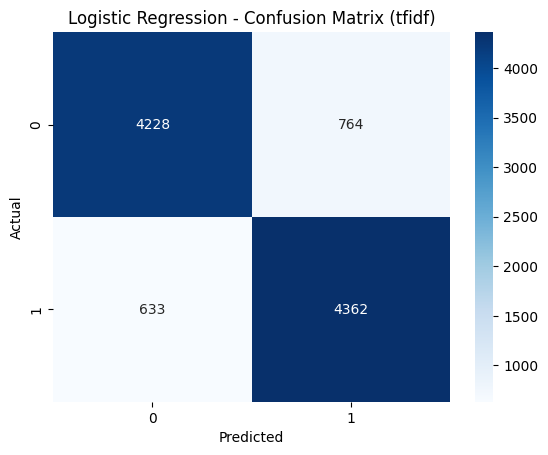

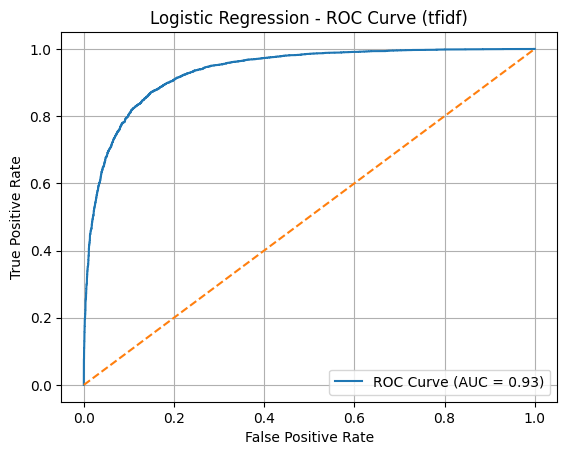

In [26]:
trainer_tfidf.run_logistic_regression()



🔹 Logistic Regression with CV
Accuracy: 0.8171623110043056

Classification Report:
               precision    recall  f1-score   support

    negative       0.82      0.81      0.82      4992
    positive       0.81      0.82      0.82      4995

    accuracy                           0.82      9987
   macro avg       0.82      0.82      0.82      9987
weighted avg       0.82      0.82      0.82      9987



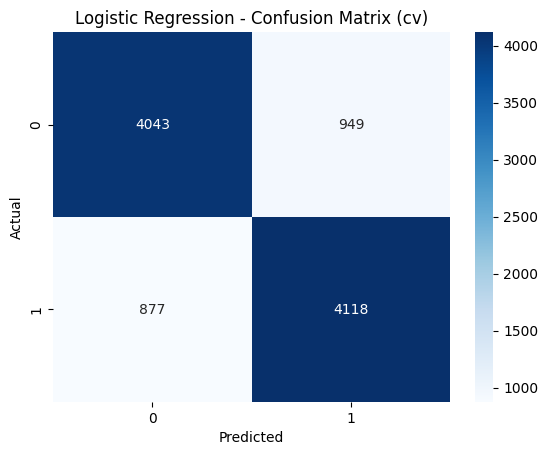

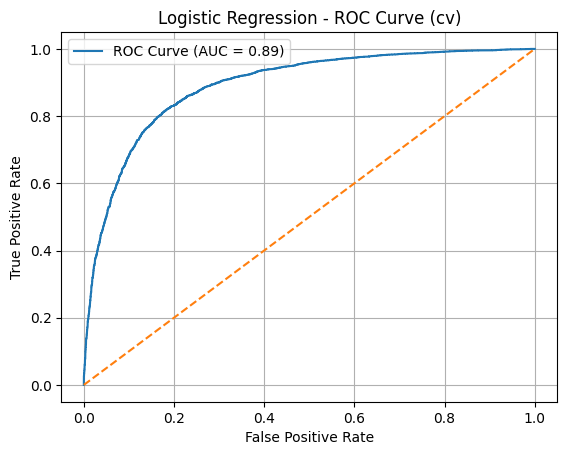

In [27]:
trainer_cv.run_logistic_regression()


🔹 Random Forest with TFIDF
Accuracy: 0.8163612696505457

Classification Report:
               precision    recall  f1-score   support

    negative       0.82      0.81      0.82      4992
    positive       0.81      0.82      0.82      4995

    accuracy                           0.82      9987
   macro avg       0.82      0.82      0.82      9987
weighted avg       0.82      0.82      0.82      9987



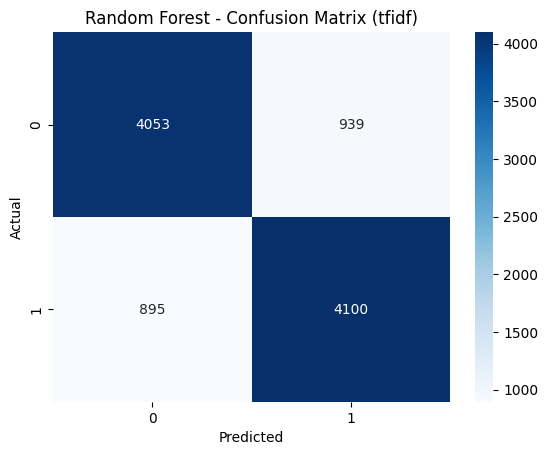

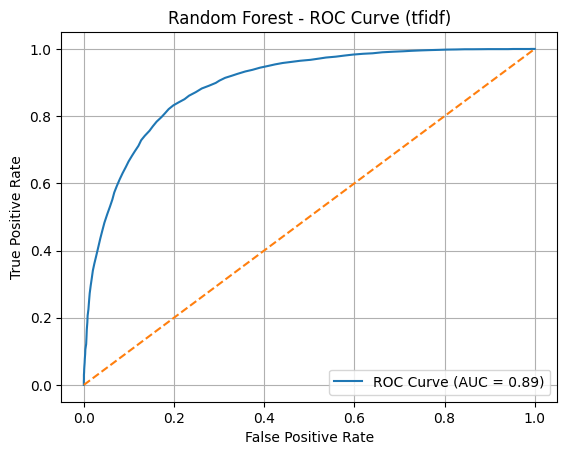

In [29]:
trainer_tfidf.run_random_forest()


🔹 Random Forest with CV
Accuracy: 0.7579853809952939

Classification Report:
               precision    recall  f1-score   support

    negative       0.76      0.76      0.76      4992
    positive       0.76      0.76      0.76      4995

    accuracy                           0.76      9987
   macro avg       0.76      0.76      0.76      9987
weighted avg       0.76      0.76      0.76      9987



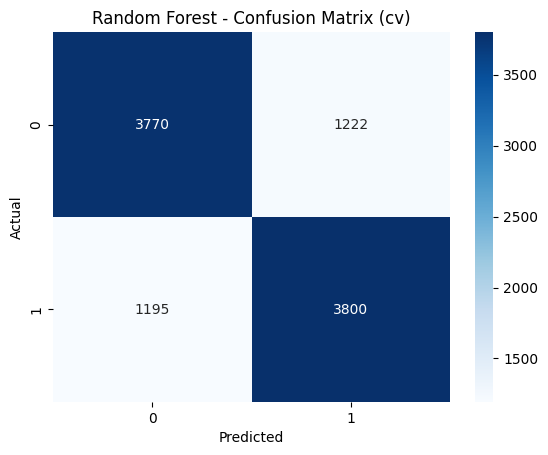

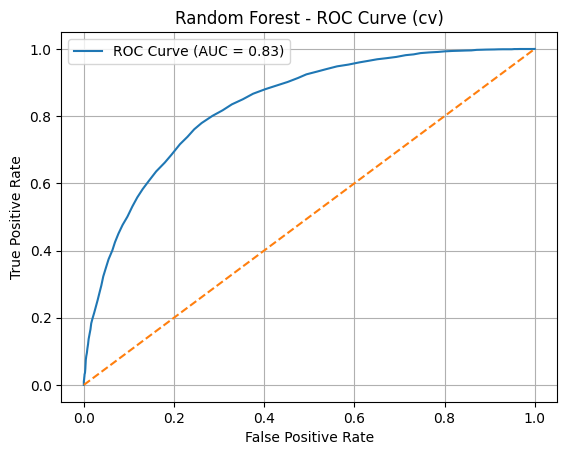

In [30]:
trainer_cv.run_random_forest()


🔹 Support Vector Machine with TFIDF
Accuracy: 0.8602182837688995

Classification Report:
               precision    recall  f1-score   support

    negative       0.87      0.85      0.86      4992
    positive       0.85      0.87      0.86      4995

    accuracy                           0.86      9987
   macro avg       0.86      0.86      0.86      9987
weighted avg       0.86      0.86      0.86      9987



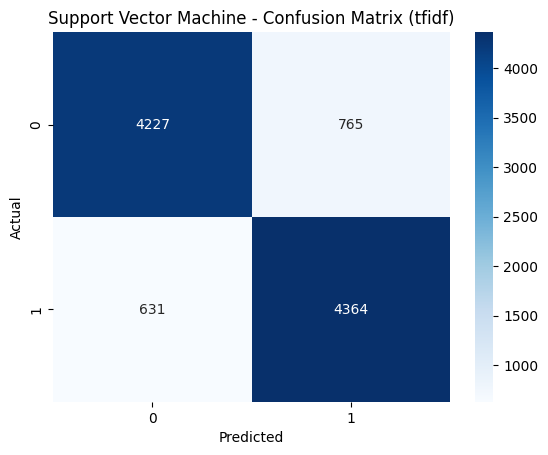

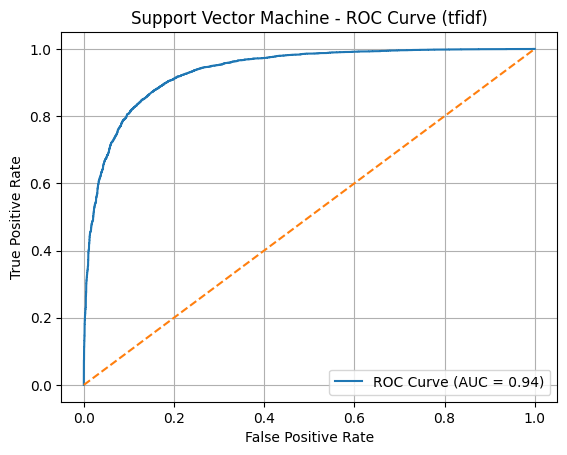

In [ ]:
trainer_tfidf.run_svm()

In [31]:
trainer_naive_tfidf = ModelTrainer(x_train_tfidf, x_test_tfidf, train_data['sentiment'], test_data['sentiment'], vectorizer_type="tfidf")
trainer_naive_cv = ModelTrainer(x_train_cv, x_test_cv, train_data['sentiment'], test_data['sentiment'], vectorizer_type="cv")



🔹 Naive Bayes with TFIDF
Accuracy: 0.864123360368479

Classification Report:
               precision    recall  f1-score   support

    negative       0.86      0.87      0.87      4992
    positive       0.87      0.86      0.86      4995

    accuracy                           0.86      9987
   macro avg       0.86      0.86      0.86      9987
weighted avg       0.86      0.86      0.86      9987



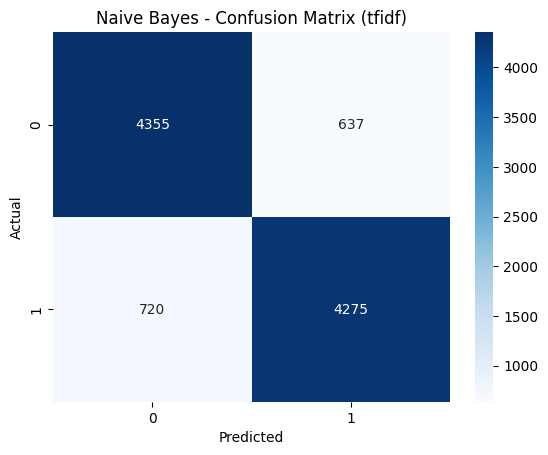

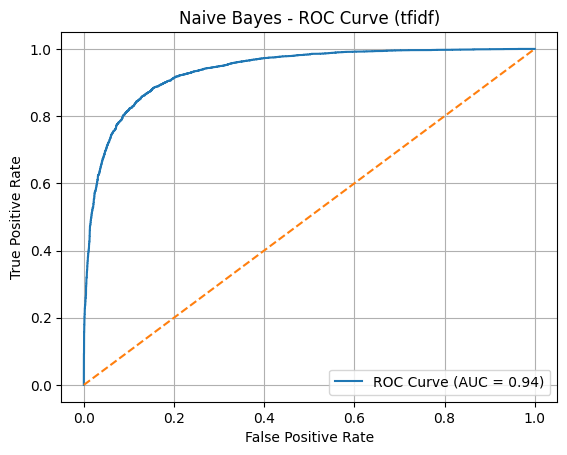

In [32]:
trainer_naive_tfidf.run_naive_bayes()


🔹 Naive Bayes with CV
Accuracy: 0.8567137278462

Classification Report:
               precision    recall  f1-score   support

    negative       0.85      0.87      0.86      4992
    positive       0.87      0.84      0.85      4995

    accuracy                           0.86      9987
   macro avg       0.86      0.86      0.86      9987
weighted avg       0.86      0.86      0.86      9987



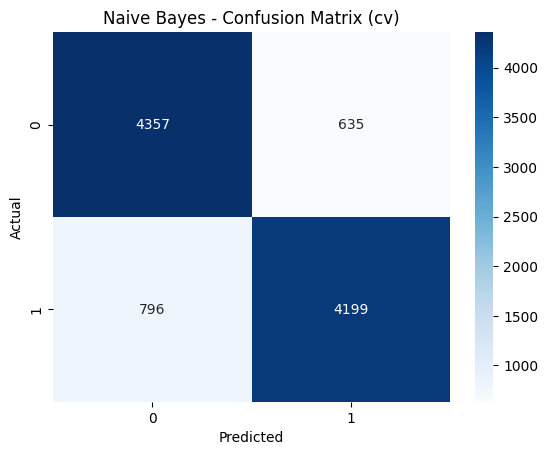

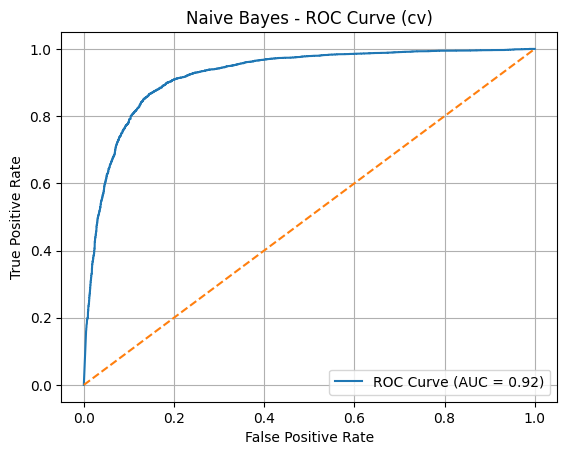

In [33]:
trainer_naive_cv.run_naive_bayes()

In [34]:
# Get comparison results
final_df = pd.concat([trainer_tfidf.get_results(), trainer_cv.get_results(),trainer_naive_cv.get_results(),trainer_naive_tfidf.get_results()], ignore_index=True)
final_df.sort_values(by="Accuracy", ascending=False)

,Model,Vectorizer,Accuracy,ROC-AUC
5,Naive Bayes,TFIDF,86.41,0.937319
0,Logistic Regression,TFIDF,86.01,0.934577
4,Naive Bayes,CV,85.67,0.922963
2,Logistic Regression,CV,81.72,0.890417
1,Random Forest,TFIDF,81.64,0.894157
3,Random Forest,CV,75.80,0.834328


# Comparision of different model performances

Here’s the **sorted comparison table** of all your models based on accuracy (descending), and **highlighting those with dimensionality reduction applied**. I’ve included the requested metrics as well:

| Rank | Model                | Vectorizer | Dimensionality Reduction | Accuracy | F1 Score | Recall | Support |
|------|----------------------|------------|---------------------------|----------|----------|--------|---------|
| 1    | **Naive Bayes**      | TF-IDF     | (No reduction)         | **0.8641** | 0.86     | 0.86   | 9987    |
| 2    | **SVM**              | TF-IDF     |    Yes                     | **0.86** | 0.86     | 0.86   | 9987    |
| 3    | **Logistic Regression** | TF-IDF |      Yes                   | **0.86** | 0.86     | 0.86   | 9987    |
| 4    | Naive Bayes          | CountVec   | (No reduction)         | 0.8567   | 0.86     | 0.86   | 9987    |
| 5    | Logistic Regression  | CountVec   |        Yes                | 0.8172   | 0.82     | 0.82   | 9987    |
| 6    | Random Forest        | TF-IDF     |       Yes                 | 0.8164   | 0.82     | 0.82   | 9987    |
| 7    | Random Forest        | CountVec   |        Yes              | 0.7580   | 0.76     | 0.76   | 9987    |



---

###  Best Model with Dimensionality Reduction:
- **Support Vector Machine (SVM)** and **Logistic Regression** with **TF-IDF** have same almost the same results. As we are doing binary classification I will prefer Logistic regreesion as it is computationally faster.
- **Accuracy**: 0.86
- **F1-Score**: 0.86  
- **Recall**: 0.86  
- **Used Dimensionality Reduction**: Yes



While **Naive Bayes with TF-IDF** achieved the highest accuracy (86.41%), it **did not use dimensionality reduction**, which was a core part of our preprocessing pipeline for consistency and generalization.

Among the models **with dimensionality reduction**, both **SVM** and **Logistic Regression** using **TF-IDF features** performed exceptionally well with identical precision, recall, and F1-scores (all at **0.86**), and near-identical accuracy (~86.02%).

However, **Logistic Regression with TF-IDF** is selected as the **final model** for the following reasons:
- It offers **competitive performance** with slightly **lower complexity** compared to SVM.
- Logistic Regression is more **interpretable**, which is important for **MLE productionization** and auditing.
- Faster **training and inference** times make it ideal for deployment pipelines.

Thus, we proceed with **Logistic Regression + TF-IDF + Dimensionality Reduction** as our **final model** for training and deployment.

